In [7]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 58.9 MB/s eta 0:00:00


In [8]:
import koreanize_matplotlib

# **시각화 툴**

## 1. Matplotlib

- Figure: 그림, 공간(이미지 출력 단위)
- Axes: (내부) 축, 영역

In [6]:
import matplotlib.pyplot as plt

In [ ]:
# stateless: 직접 지정
# 디테일, 자유도 높음
import matplotlib

fig = plt.figure()
ax = fig.add_axes()
fig, ax = plt.subplots()

ax.plot(x, y1)
ax.plot(x, y2)

plt.show()

In [ ]:
# stateful: 자동 지정
# 편리, 자유도 적음
import matplotlib.pyplot

plt.figure()

plt.subplot()
plt.plot()

plt.subplot()
plt.plot()

plt.show()

## 2. Seaborn

- Pandas의 DataFrame과의 호환성 뛰어남
- 간단한 사용 방법
- 제한된 사용성


- sns.lineplot(data=dataframe, x='x', y='y')


- https://seaborn.pydata.org/tutorial.html

In [2]:
import seaborn as sns

In [4]:
# seaborn에서 제공하는 데이터셋
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


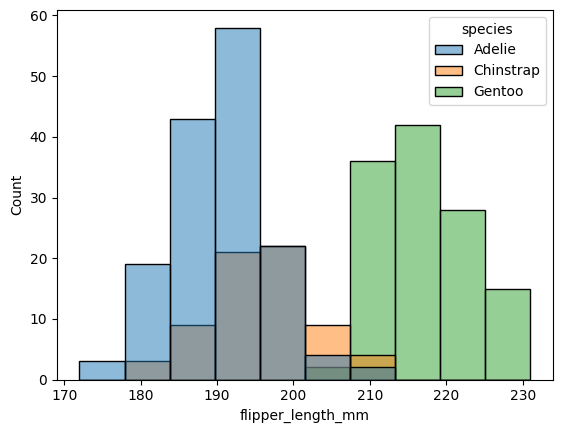

In [7]:
sns.histplot(data=penguins, x='flipper_length_mm', hue='species') # hue : 범례지정
plt.show()

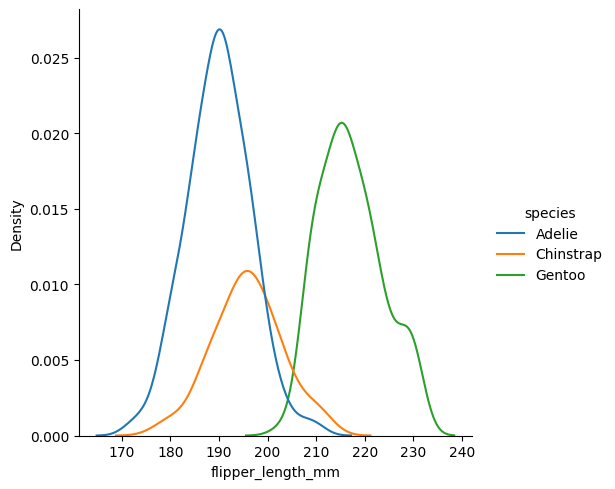

In [9]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', kind='kde')  # 'kde': 커널밀도추정
plt.show()

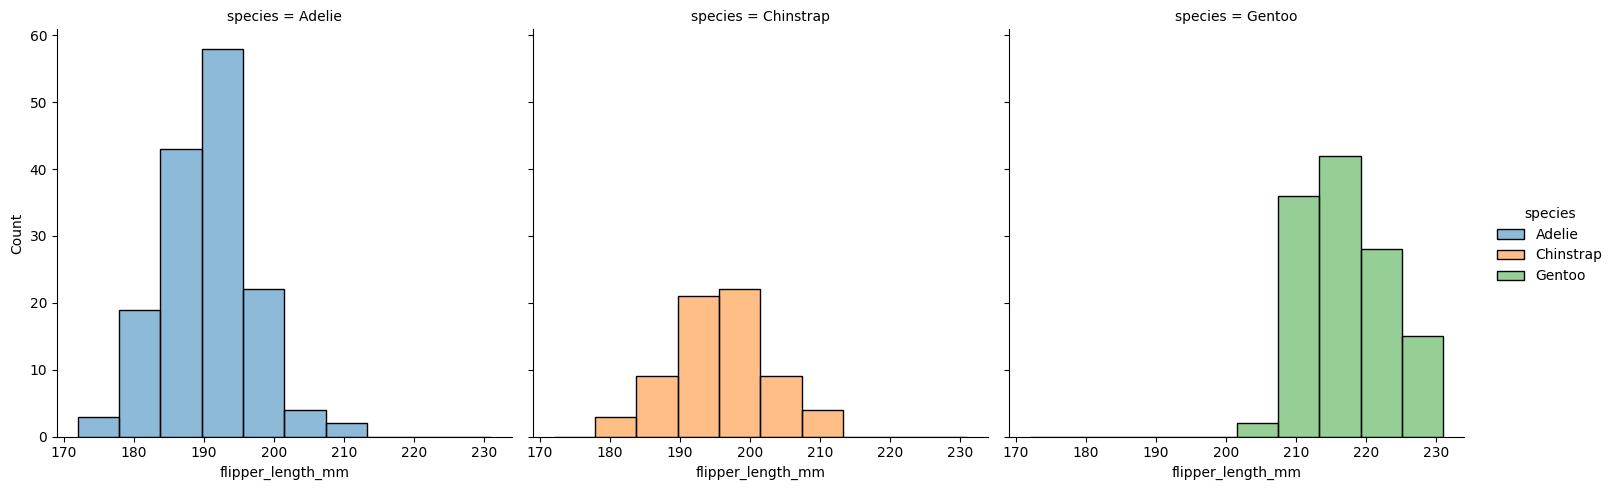

In [11]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', col='species')  # 'kde': 커널밀도추정
plt.show()

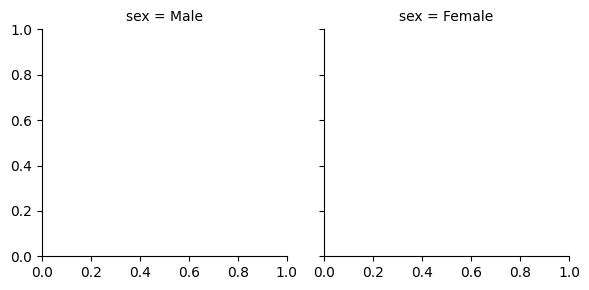

In [27]:
import matplotlib.pyplot as plt

# f, ax = plt.subplots(1, 2)

sns.FacetGrid(penguins, col='sex')
plt.show()

**<h3><< 상관관계(Correlation Coefficient) >></h3>**


* 두 변수가 선형관계(비례, 반비례)를 가진다. <br/>
→ 두 변수의 인과 관계를 나타내는 것이 아님 <br/>


* -1 에서 1까지의 값을 가진다. <br/>
→ 양수: 양의 상관 계수(비례), 음수: 음의 상관 계수(반비례) <br/>
→ -1, 1 에 가까울수록 두 변수의 상관 관계가 높음 <br/>


* 변수 간 상관관계 → pairplot, heatmap


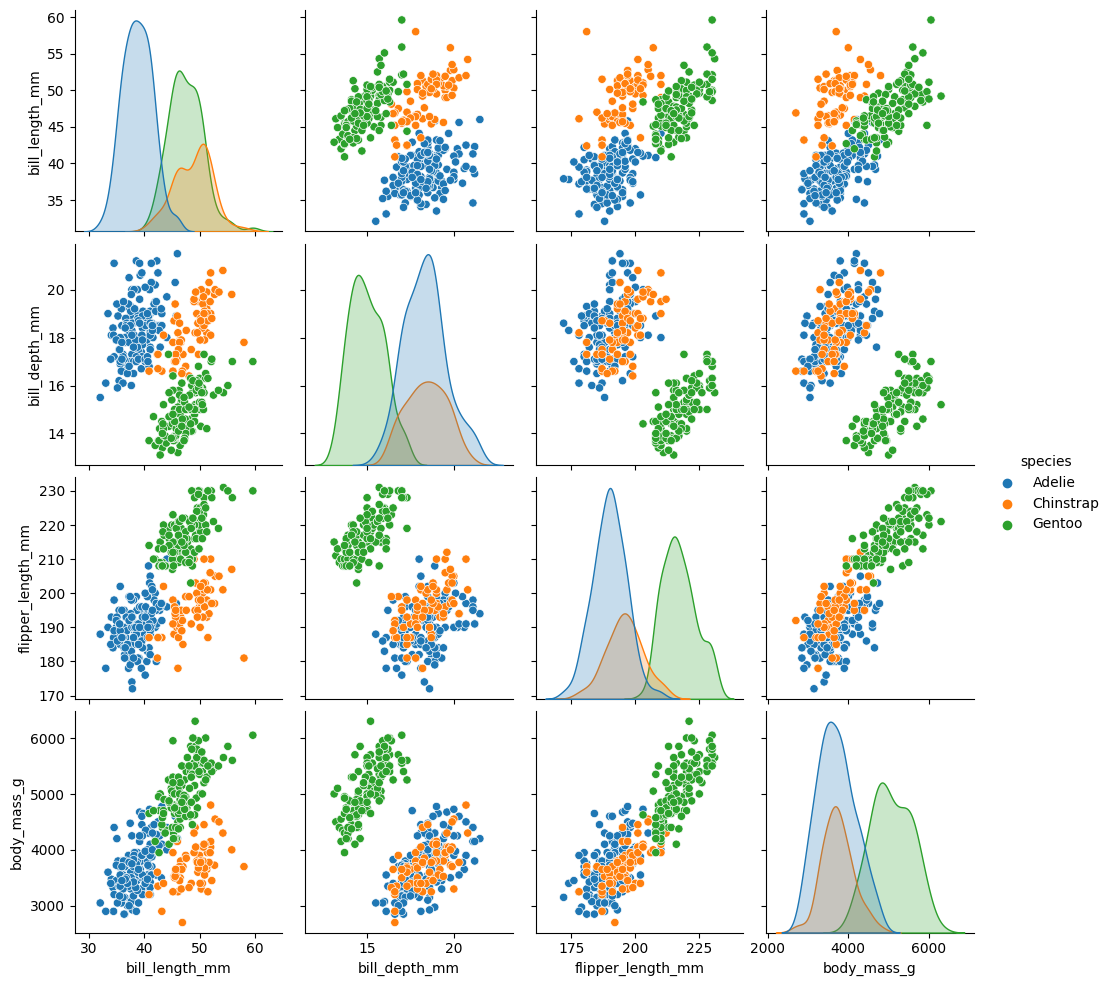

In [15]:
sns.pairplot(data=penguins, hue='species')  # 상관관계에 대한 그래프
plt.show()

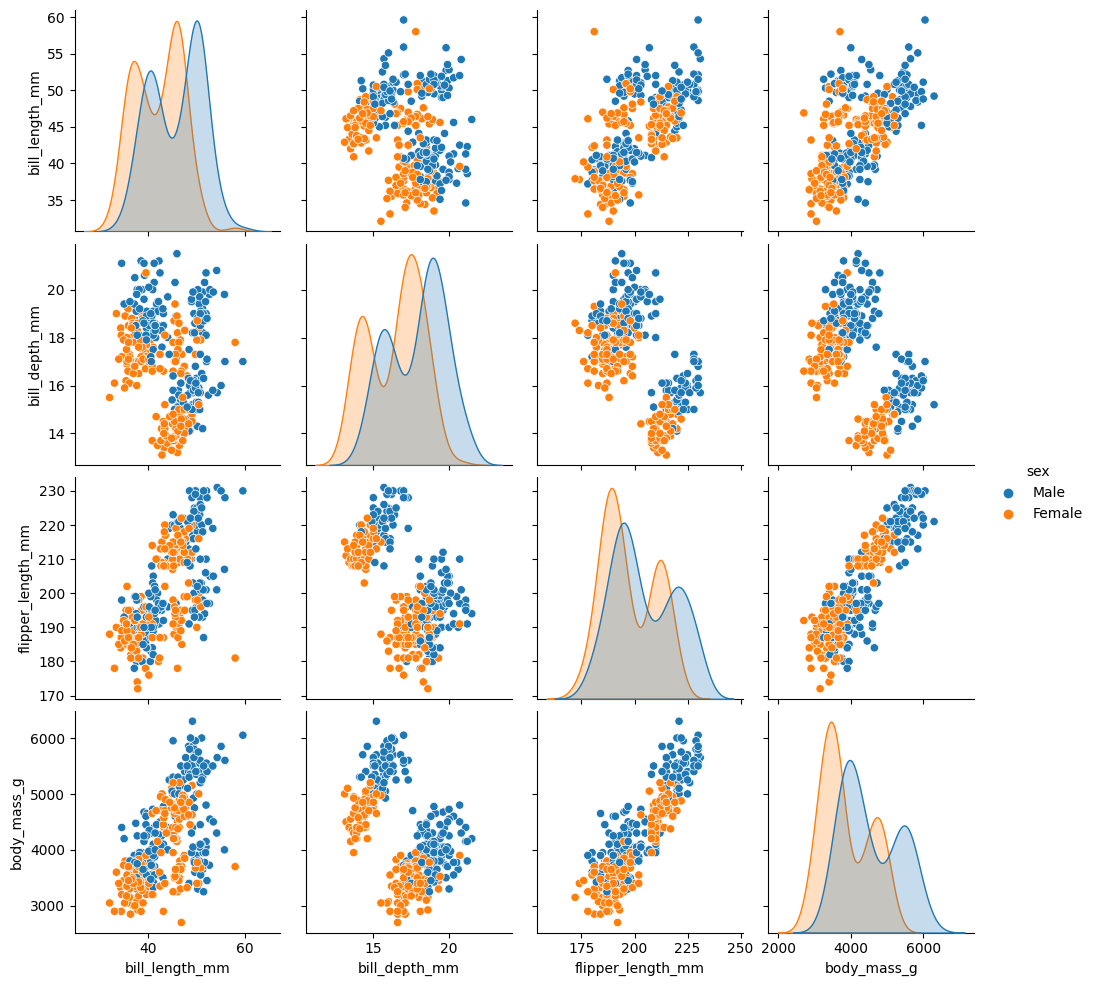

In [16]:
sns.pairplot(data=penguins, hue='sex')
plt.show()

<ipython-input-24-2072c094b4d3>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue = sns.load_dataset('glue').pivot('Model', 'Task', 'Score')


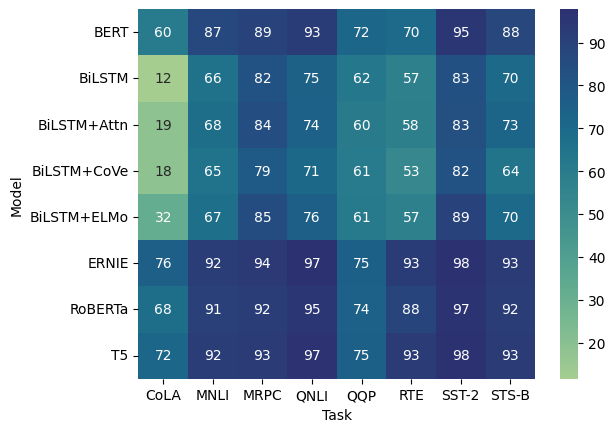

In [24]:
glue = sns.load_dataset('glue').pivot('Model', 'Task', 'Score')
sns.heatmap(glue, annot=True, cmap='crest')
plt.show()

# IBM Attrtion 데이터

- IBM에서 만든 데이터 (가상 데이터)
- 여러 변수들(연봉, 직업만족도 ... ) -> 퇴사
- 여러 변수들 + 퇴사


- 연봉, 만족도, 가족, ..., 퇴사(O)
- 연봉, 만족도, 가족, ..., 퇴사(X)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  **<h3>1. 데이터 불러오기(모듈 세팅)</h3>**

In [6]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition_2.csv')

## **<h3>2. 데이터 정보 확인</h3>**

In [30]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [32]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [33]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## **<h3>3. 데이터 전처리</h3>**

- data type 변환
- drop

In [47]:
# data type이 object인 컬럼만 확인
df[df.columns[df.dtypes == 'object']].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [ ]:
# object(string) -> 내가 어떤 형태로 변화을 해야하는가?
# object 인식이 어려운 경우가 많음 -> 2가지 : one-hot encoding(0,1), label encoding(0, 1, 2, 3 ...)

In [ ]:
df.columns[df.nunique() == 1]

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')

In [ ]:
df['EmployeeCount'].unique(), df['EmployeeCount'].dtypes

(array([1]), dtype('int64'))

In [ ]:
df['Over18'].unique(), df['Over18'].dtypes

(array(['Y'], dtype=object), dtype('O'))

In [ ]:
df['StandardHours'].unique(), df['StandardHours'].dtypes

(array([80]), dtype('int64'))

In [9]:
df = df.drop(labels=['EmployeeCount', 'StandardHours'], axis=1)
len(df.columns)

33

## **<h3>4. 데이터 시각화 및 분석</h3>**

In [ ]:
# Attrition 이 우리에게 중요한 데이터
# 이 데이터와 다른 데이터들을 비교해봐야한다.

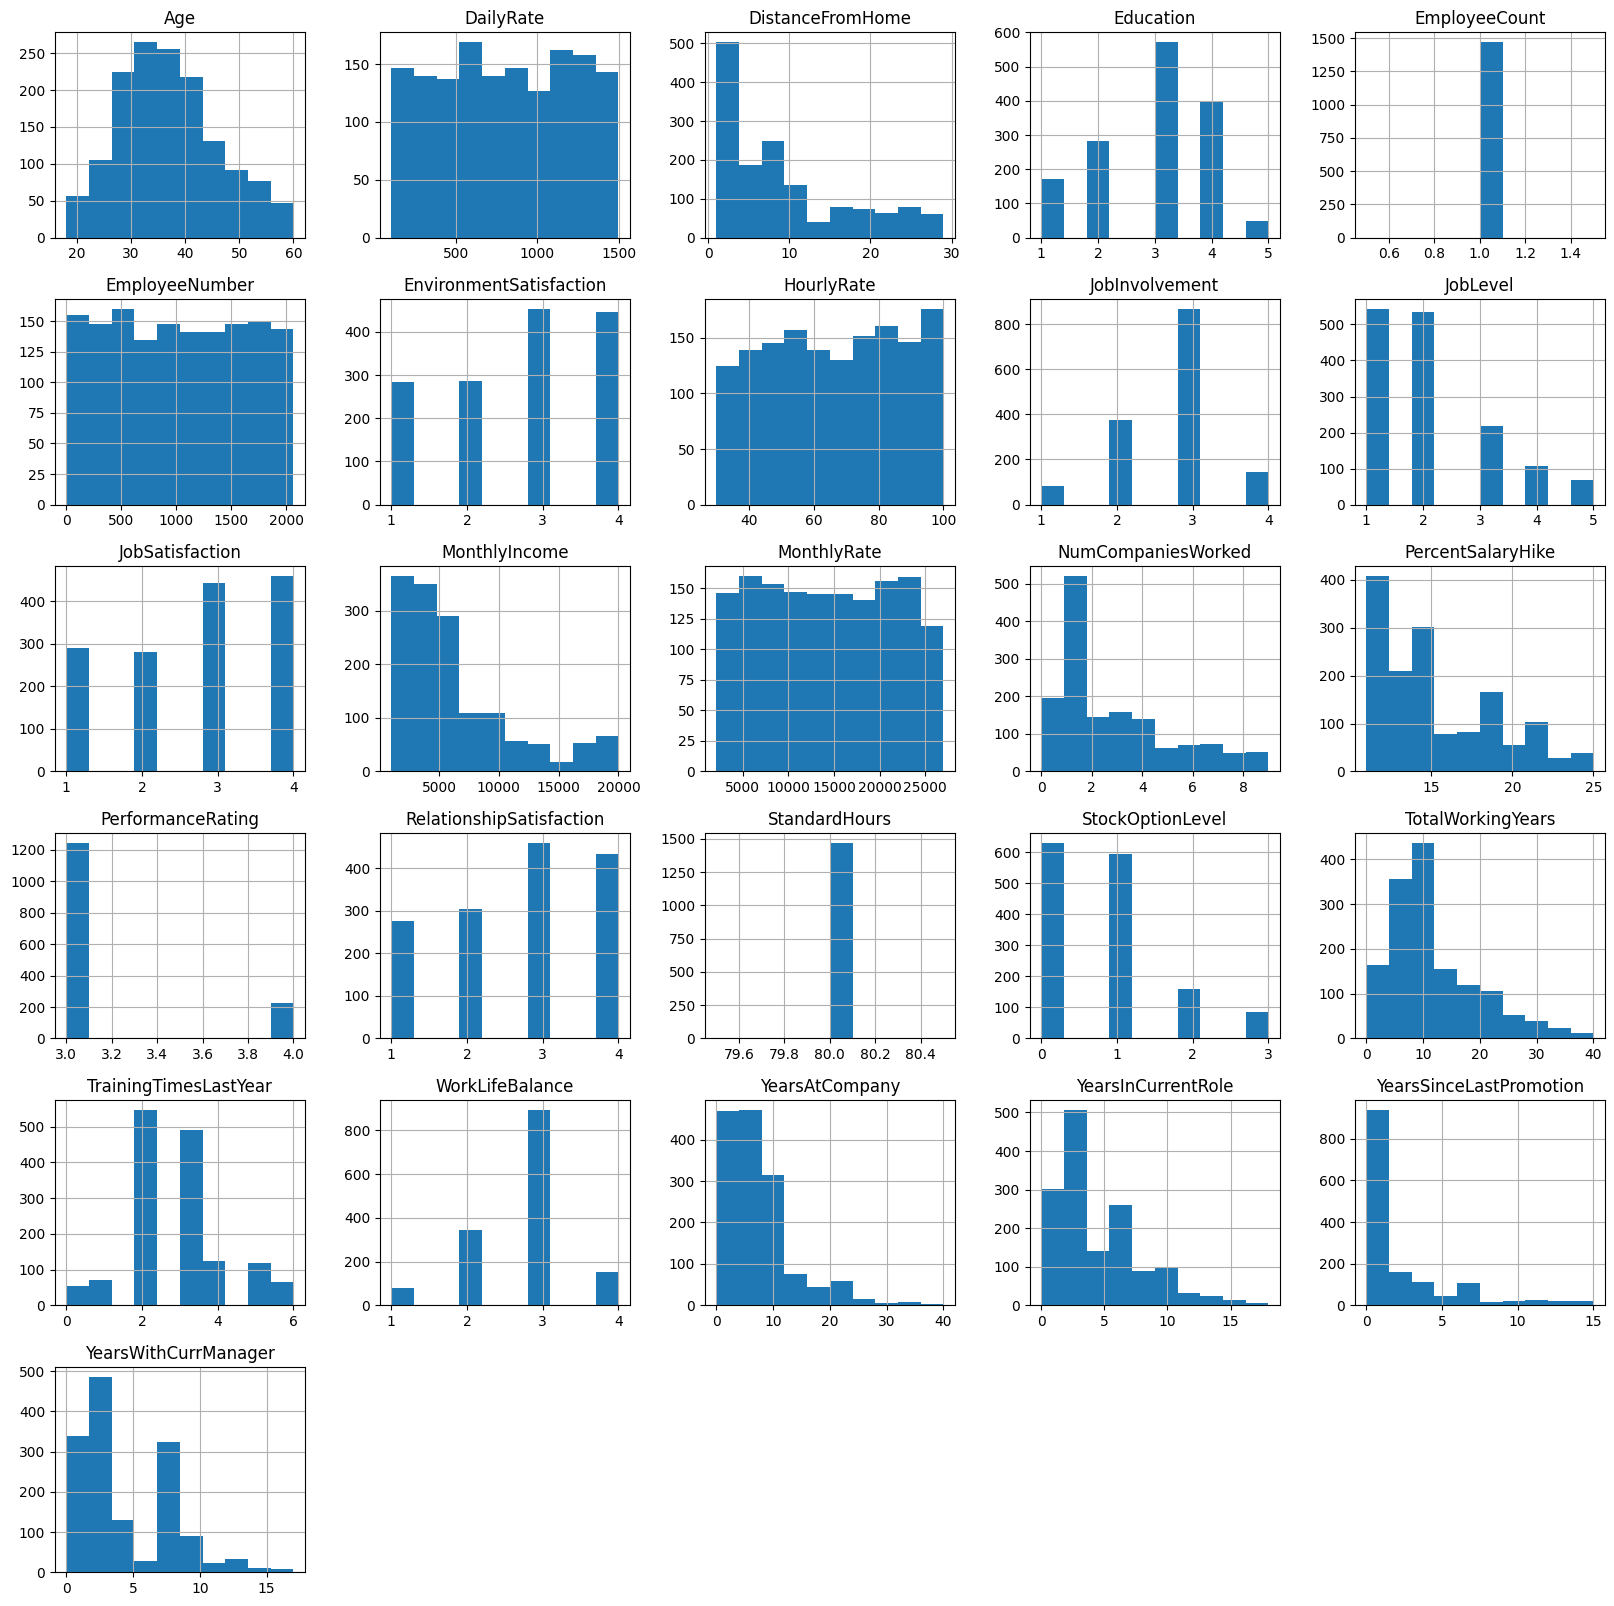

In [54]:
df.hist(figsize=(20,20))
plt.show() # EmployeeCount, StandardHours -> 하나의 값만 가짐

In [55]:
sns.pairplot(data=df, hue='Attrition')  # 16분 5초 걸림....

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-68-d2cba6ba0843>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


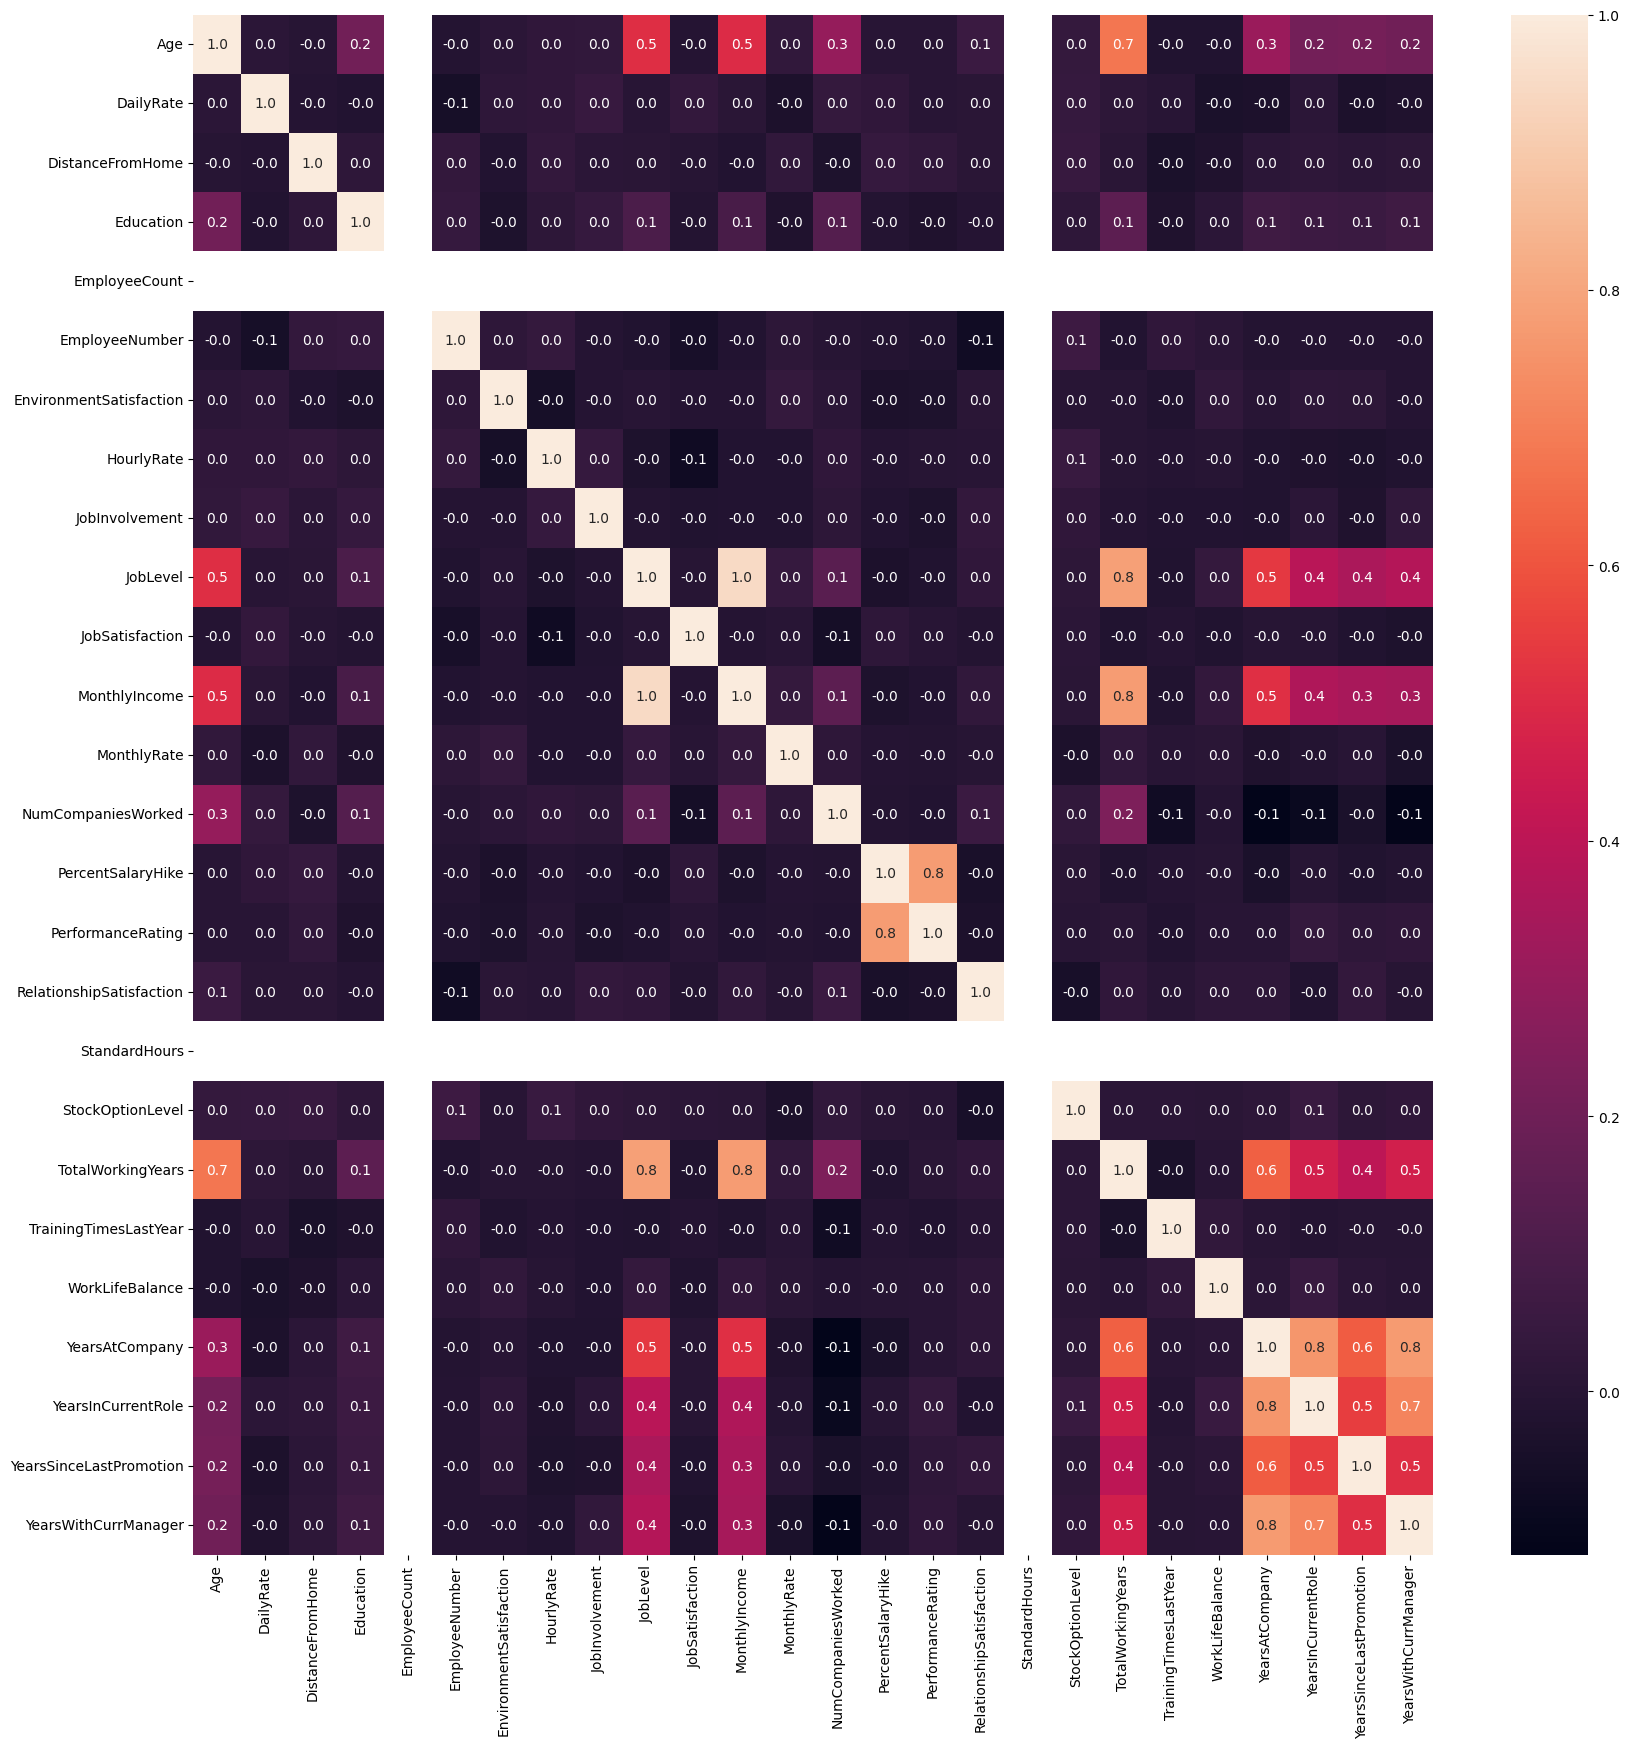

In [68]:
# 상관관계 파악하기
corr = df.corr()
corr.shape

plt.figure(figsize=(20, 20))
sns.heatmap(corr, fmt='.1f', annot=True)  # 문자로된 컬럼들이 빠짐. 소수점 첫째자리까지만
plt.show()

# -1, 1 양 끝 값에 가까울수록 상관관계 높음
# 0.3 < a : 상관관계가 있다 / 0.7 < a : 상관관계가 높다.

# PercentSalaryHike - PerformanceRating 0.8
# TotlaWorkingYears - JobLevel 0.8
# TotalWorkingYears - Age 0.7
# YearsWithCorrManager - YearsAtCompany 0.8
# YearsWithCurrManager - YearsCurrentRole 0.7
# 0.5 이상의 값들 찾아주세요.

### **<h3><< 상관관계가 높은 변수들 위주로 데이터 탐색하기 >></h3>**

In [ ]:
# PercentSalaryHike - PerformanceRating 0.8
# TotlaWorkingYears - JobLevel 0.8
# TotalWorkingYears - Age 0.7
# YearsWithCorrManager - YearsAtCompany 0.8
# YearsWithCurrManager - YearsCurrentRole 0.7

### 전체 직원 중 퇴사 인원 비율

퇴사 직원 수 : 237
전체 직원 수 : 1470
전체 직원 중 퇴사 인원 비율 : 16.12 %


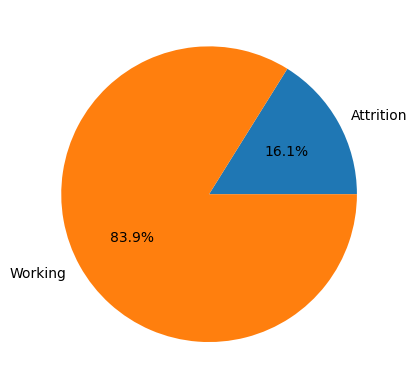

In [88]:
# 전체 직원 중 퇴사 인원 비율
total_emp = df['Attrition'].count()
attrition_yes = df["Attrition"][df['Attrition']=="Yes"].count()
attrition_no = total_emp - attrition_yes

print("퇴사 직원 수 :", attrition_yes)
print("전체 직원 수 :", total_emp)
print("전체 직원 중 퇴사 인원 비율 :", round(attrition_yes/total_emp * 100, 2), "%")

plt.pie([attrition_yes, attrition_no], labels=["Attrition", "Working"], autopct="%.1f%%")
plt.show()

### 직업 레벨에 따른 퇴사 비율

레벨별 퇴사율 :
Entry       26.34
Mid          9.74
Senior      14.68
Lead         4.72
Excutive     7.25
Name: JobLevel, dtype: float64


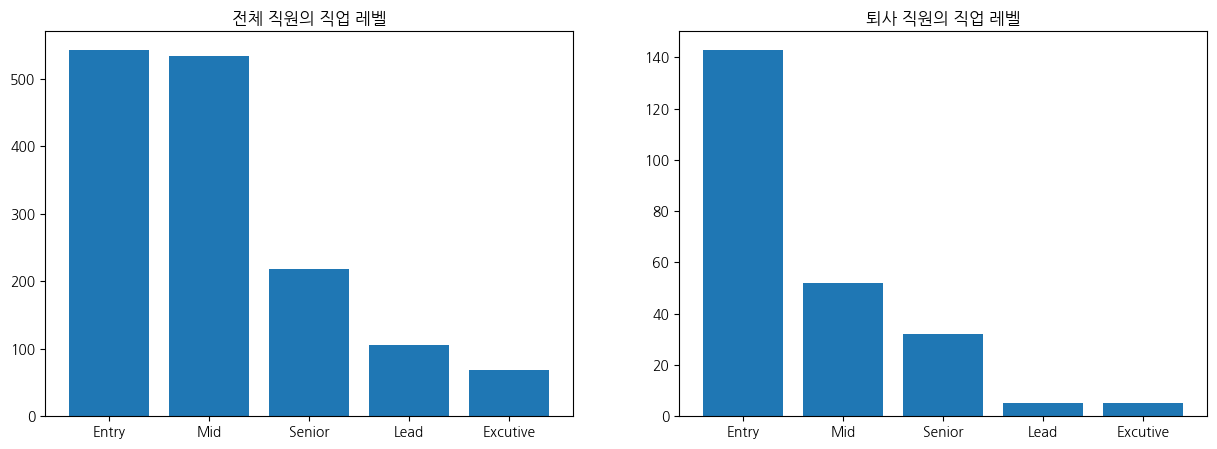

In [10]:
# 직업 레벨에 따른 퇴사 비율
df['JobLevel'].value_counts()

# pandas Categorical
df['JobLevel'] = pd.Categorical(df["JobLevel"]).rename_categories(['Entry', 'Mid', 'Senior', 'Lead', 'Excutive'])
df['JobLevel'].value_counts()

# df.groupby(['JobLevel', 'Attrition'])["Age"].count().to_frame(name='count')
attrition_joblevel = df[df["Attrition"]=="Yes"]["JobLevel"].value_counts()
emp_joblevel = df["JobLevel"].value_counts()

print("레벨별 퇴사율 :")
print(round(attrition_joblevel/emp_joblevel * 100, 2))

plt.figure(figsize=(15,5))
# bar : 전체 직원 수 중 JobLevel 분포
plt.subplot(1, 2, 1)
plt.title('전체 직원의 직업 레벨')
plt.bar(df['JobLevel'].value_counts().index, df['JobLevel'].value_counts().values)

# bar : 퇴사 직원 수 중 JobLevel 분포
plt.subplot(1, 2, 2)
plt.title('퇴사 직원의 직업 레벨')
plt.bar(attrition_joblevel.index, attrition_joblevel.values)

plt.show()

In [ ]:
## 정렬 ##
df['JobLevel'].sort_value(ascending=False)  # 값의 크기에 따라서 1 - 5
# sort_value(ascending=True)
# sort_value(by='Attrition')

### 나이에 따른 퇴사 비율

In [305]:
# 나이에 따른 퇴사 비율
df['Age'].unique()

# 나이대 구간 별로 나누기
# 10 ~ 60대
# 여러개의 컬럼들
df['Age_10'] = df['Age'][(df['Age'] >= 10) & (df['Age'] < 20)]
df['Age_20'] = df['Age'][(df['Age'] >= 20) & (df['Age'] < 30)]
df['Age_30'] = df['Age'][(df['Age'] >= 30) & (df['Age'] < 40)]
df['Age_40'] = df['Age'][(df['Age'] >= 40) & (df['Age'] < 50)]
df['Age_50'] = df['Age'][(df['Age'] >= 50) & (df['Age'] < 60)]
df['Age_60'] = df['Age'][(df['Age'] >= 60) & (df['Age'] < 70)]

# 한 컬럼에 넣기
ages = [df['Age_10'], df['Age_20'], df['Age_30'], df['Age_40'], df['Age_50'], df['Age_60']]
age_cols = pd.concat(ages, axis=1)

# 조건에 따라서 값을 넣어줌
# 컬럼 ,행으로 값을 넣어주어야 함
# 행기준으로 데이터를 순회하면서 값이 있는 것을 새로운 컬럼에 넣어준다.

# numpy where
# np.where(조건, 참일 때 넣어줄 값, 거짓일 때 넣어줄 값)

import numpy as np

col_names = list(age_cols.columns)

# 방법1 : np.where() 사용
df['Ages'] = pd.Series(index=range(len(df)), dtype='float64')
for i in col_names:
  df['Ages'] = np.where(df[i].notnull(), i[-2:], df['Ages'])
print('방법1 :', df['Ages'].unique())

# 방법2 : 조건에 해당하는 index값 찾아서 값 넣기
df['Ages_2'] = pd.Series(index=range(len(df)), dtype='float64')
for i in col_names:
  indexes = (df[df[i].notnull()].index)
  df.loc[indexes, 'Ages_2'] = 'age_'+i[-2:]
print('방법2 :', df['Ages_2'].unique())

방법1 : ['40' '30' '20' '50' '10' '60']
방법2 : ['age_40' 'age_30' 'age_20' 'age_50' 'age_10' 'age_60']


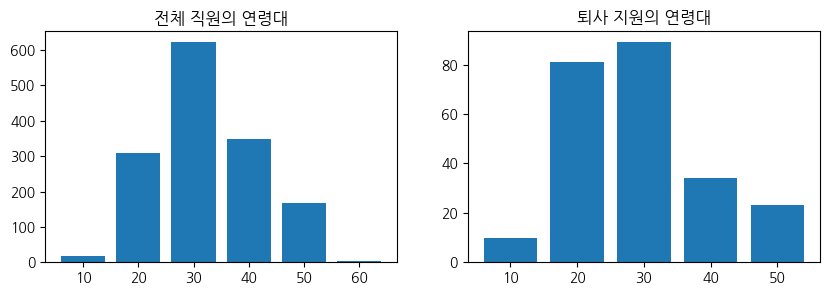

In [324]:
emp_age = df['Ages'].value_counts().sort_index()
attrition_age = df[df['Attrition']=='Yes']['Ages'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.title("전체 직원의 연령대")
plt.bar(emp_age.index, emp_age)

plt.subplot(1,2,2)
plt.title("퇴사 지원의 연령대")
plt.bar(attrition_age.index, attrition_age)

plt.show()

### 직급에 따른 연봉

In [ ]:
# 직급에 따른 연봉
# 직급 : JobLevel
# 월수익 : MonthlyIncome -> 연봉

# 연봉 계산
df['annual_s'] = df['MonthlyIncome'] * 12

# 직급별로 groupby
job_annual_salary = df.groupby('JobLevel')['annual_s'].mean()

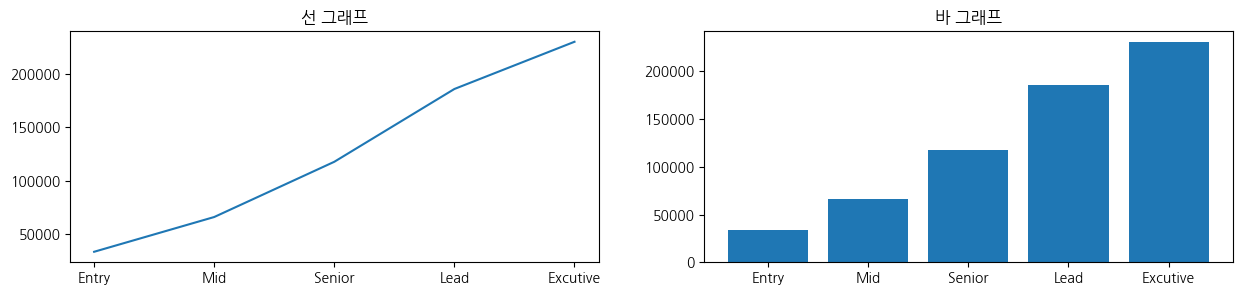

In [340]:
# Matplotlib으로 그래프 그리기
plt.figure(figsize=(15,3))

# plot -> 연속된 값이 아니기 때문에 선 그래프가 적절하지 않다.
plt.subplot(1,2,1)
plt.title('선 그래프')
plt.plot(job_annual_salary)

# bar
plt.subplot(1,2,2)
plt.title('바 그래프')
plt.bar(job_annual_salary.index, job_annual_salary)

plt.show()

In [341]:
job_annual_salary

JobLevel
Entry        33442.983425
Mid          66027.325843
Senior      117807.027523
Lead        186045.396226
Excutive    230301.913043
Name: annual_s, dtype: float64

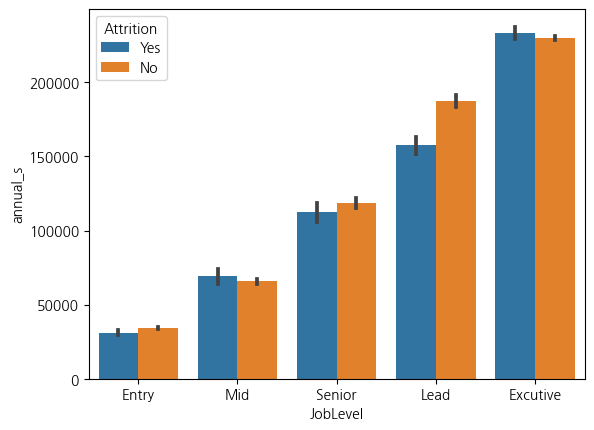

In [343]:
# Seaborn으로 그래프 그리기
sns.barplot(data=df,x='JobLevel',y='annual_s', hue='Attrition')
plt.show()

### 성별에 따른 퇴사 비율 (퇴사자 중 남녀성비)

In [345]:
# 성별에 따른 퇴사 비율 (퇴사자 중 남녀성비)
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

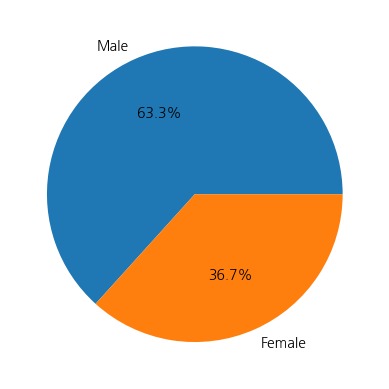

In [13]:
# 퇴사자의 성별
attrition_gen = df[df['Attrition']=='Yes']['Gender']
attrition_gen.value_counts()

# pid 그래프
plt.pie(attrition_gen.value_counts(), labels=attrition_gen.value_counts().index, autopct="%.1f%%")
plt.show()

In [20]:
# one-hot encoding : 텍스트(범주) -> 숫자

# 1. 판다스에서 제공하는 get_dummies
oh_gender = pd.get_dummies(df, columns=['Gender'])
print('Female :', oh_gender['Gender_Female'][oh_gender['Gender_Female']==1].count())
print('Male :', oh_gender['Gender_Male'][oh_gender['Gender_Male']==1].count())
# gender 별 분류 -> 성별 카운팅 가능

Female : 588
Male : 882


### 연봉에 따른 퇴사 비율

In [ ]:
# 연봉에 따른 퇴사 비율

### 연차에 따른 퇴사 비율

In [ ]:
# 연차에 따른 퇴사 비율